In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
import seaborn as sns
import time
# in house functions: 
%run 'DST_fun.ipynb' # model_report() and review_vector() 

train_df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col=0)
feature_cols = ['n_avis','sentiment_norm','longueur_texte']+ [colname for colname in train_df.columns if "bank_" in colname] 

y_train = train_df.etoiles
X_train = train_df.drop("etoiles", axis = 1)
X_train = train_df[feature_cols]

test_df = pd.read_csv('../data/avis/test_noYC_lemma_sent_equil.csv', index_col=0)
y_test = test_df['etoiles']
X_test = test_df.drop("etoiles", axis =1)
X_test = test_df[feature_cols]

model_name = "K-NN"

#train.head()
X_train.head(2)

# 0 Modelisation de base n_avis, length

# 1. modelisation n avis, sentiment, longeur txt

train score:  0.51
              precision    recall  f1-score   support

           1       0.53      0.65      0.58       562
           2       0.44      0.44      0.44       562
           3       0.48      0.41      0.44       562
           4       0.47      0.43      0.45       562
           5       0.61      0.60      0.61       562

    accuracy                           0.51      2810
   macro avg       0.50      0.51      0.50      2810
weighted avg       0.50      0.51      0.50      2810



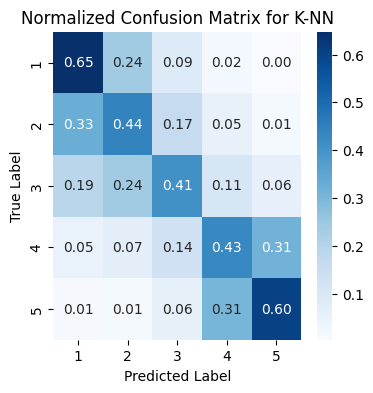

creating new csv for K-NN


In [3]:
test_name =f"{model_name}- n_avis, sentiment, text length, companies"
model = KNeighborsClassifier()
t0 = time.time()
model.fit(X_train, y_train)
model_report(test_name, model_name)

# 2. Grid SVM n_avis, sentiment, txt length

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.450 total time=   2.3s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=distance;, score=0.478 total time=   2.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=distance;, score=0.452 total time=   2.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=distance;, score=0.467 total time=   2.3s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.472 total time=   2.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=distance;, score=0.448 total time=   2.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.453 total time=   2.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.455 total time=   2.5s
[CV 4/5] END algorithm=ball_tree, le

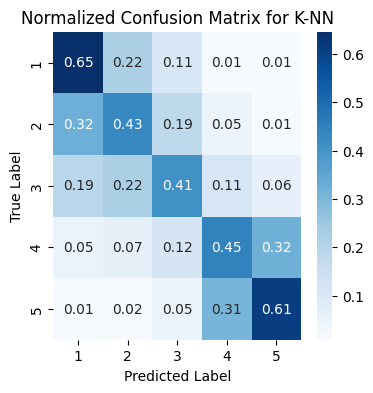

In [4]:
test_name =f"{model_name}- GRID n_avis, sentiment, text length, companies"
# definir des hyper paramètres à tester
param_grid = {
    'n_neighbors': [2,3,4,5,6,7,8],
    'weights': ['uniform', 'distance'], 
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'leaf_size':[10,20,30,40,50],   
}

# tester les différents paramètres
t0= time.time()
model = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs =-1,
                      refit = True, verbose = 3)
model.fit(X_train, y_train)
print("best parameters", model.best_params_)
model_report(test_name, model_name)

# 3. Grid SVM: text TFIDF, n_avis, sent, length

train score:  0.45
              precision    recall  f1-score   support

           1       0.50      0.63      0.56       562
           2       0.42      0.40      0.41       562
           3       0.42      0.30      0.35       562
           4       0.41      0.46      0.43       562
           5       0.49      0.46      0.47       562

    accuracy                           0.45      2810
   macro avg       0.45      0.45      0.44      2810
weighted avg       0.45      0.45      0.44      2810



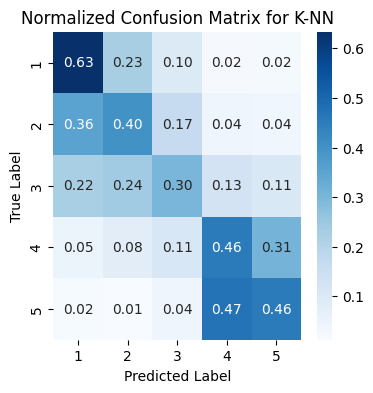

In [7]:
test_name =f"{model_name} - GRID n_avis, sentiment, text length, companies"
X_train = review_vector(train_df, feature_cols)
X_test = review_vector(test_df, feature_cols)
model = KNeighborsClassifier()
t0 = time.time()
model.fit(X_train, y_train)
model_report(test_name, model_name)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=distance;, score=0.461 total time=  13.2s
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.462 total time=  13.4s
[CV 5/5] END algorithm=brute, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.466 total time=  13.4s
[CV 1/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=distance;, score=0.477 total time=  13.6s
[CV 4/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=distance;, score=0.480 total time=  13.6s
[CV 3/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=distance;, score=0.464 total time=  13.6s
[CV 1/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.460 total time=  13.7s
[CV 4/5] END algorithm=brute, leaf_size=10, n_neighbors=2, weights=uniform;, score=0.468 total time=  13.7s
[CV 1/5] END algorithm=brute, leaf_size=10, n_neighbors=3, weights=uni

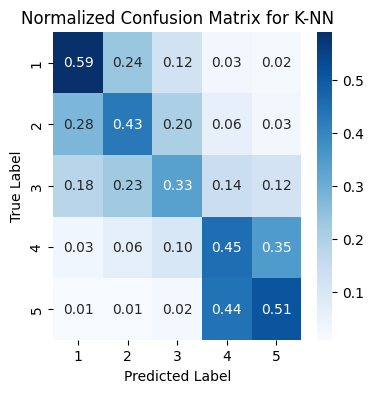

In [9]:
test_name =f"{model_name}- GRID text TFIDF, n_avis, sentiment, text length, companies"
# Vectorization des avis lémmatisés

# tester les différents paramètres
t0= time.time()
param_grid = {
    'n_neighbors': [2,3,4,5,6,7,8],
    'weights': ['uniform', 'distance'], 
    'algorithm': ["brute"], # tree based algorithms won't work with sparse matrix
    'leaf_size':[10,20,30,40,50],   
}
model = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1,
                     refit = True, verbose = 3)
model.fit(X_train, y_train)
# reporting
model_report(test_name, model_name)

# Recap

In [ ]:
bench = pd.read_csv(f'../reports/benchmark/{model_name}_model_benchmark.csv', index_col=0).drop_duplicates(subset=['model'], keep= "last")
bench